# 1. 국가(대륙)별/상품군별 온라인쇼핑몰

### 1.  K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
    * K-Beauty란?
    * e:추정치, p:잠정치, -:자료없음, ...: 미상자료, x : 비밀보호

# 필요 라이브러리 가져오기

In [1]:
# 라이브러리 코드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 시각화를 위한 폰트 설정
import os
if os.name =="nt":
    sns.set(font="Malgun Gothic")

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format="retina"

# 3 데이터 로드하기

In [4]:
df_raw=pd.read_csv("../data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20220316133114.csv", encoding="cp949")
df_raw

,국가(대륙)별,상품군별,판매유형별,2021.3/4,2021.4/4 p)
0,합계,합계,계,1006236,937155
1,합계,합계,면세점,795815,681168
2,합계,합계,면세점 이외,210421,255987
3,합계,컴퓨터 및 주변기기,계,3589,3468
4,합계,컴퓨터 및 주변기기,면세점,0,0
...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,369,1256
447,기타,기 타,계,1166,1600
448,기타,기 타,면세점,0,0


In [5]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [6]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"]=="미국"]

,국가(대륙)별,상품군별,판매유형별,2021.3/4,2021.4/4 p)
45,미국,합계,계,65865,76637
46,미국,합계,면세점,100,108
47,미국,합계,면세점 이외,65765,76529
48,미국,컴퓨터 및 주변기기,계,1518,1133
49,미국,컴퓨터 및 주변기기,면세점,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,1518,1133
51,미국,가전·전자·통신기기,계,1650,2727
52,미국,가전·전자·통신기기,면세점,5,1
53,미국,가전·전자·통신기기,면세점 이외,1645,2726
54,미국,소프트웨어,계,204,280


# 4 분석과 시각화를 위한 tidy data 만들기

In [7]:
df=df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], var_name="기간", value_name="백만원")
df.shape

(900, 5)

In [8]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2021.3/4,1006236
1,합계,합계,면세점,2021.3/4,795815
2,합계,합계,면세점 이외,2021.3/4,210421
3,합계,컴퓨터 및 주변기기,계,2021.3/4,3589
4,합계,컴퓨터 및 주변기기,면세점,2021.3/4,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  900 non-null    object
 1   상품군별     900 non-null    object
 2   판매유형별    900 non-null    object
 3   기간       900 non-null    object
 4   백만원      900 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 35.3+ KB


# 5 데이터 전처리

### 5.1 기간에서 연도를 분리하기

In [10]:
int("2021.4/4 p)".split('.')[0])


2021

In [11]:
df['연도']=df['기간'].map(lambda x :int(x.split('.')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2021.3/4,1006236,2021
1,합계,합계,면세점,2021.3/4,795815,2021
2,합계,합계,면세점 이외,2021.3/4,210421,2021
3,합계,컴퓨터 및 주변기기,계,2021.3/4,3589,2021
4,합계,컴퓨터 및 주변기기,면세점,2021.3/4,0,2021


In [12]:
# 기간에서 분기만 분리하기
"2021.4/4 p)".split('.')[1].split()[0].split('/')[0]

'4'

In [13]:
# 분기 컬럼만들기
df['분기']=df['기간'].map(lambda x : int(x.split('.')[1].split()[0].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2021.3/4,1006236,2021,3
1,합계,합계,면세점,2021.3/4,795815,2021,3
2,합계,합계,면세점 이외,2021.3/4,210421,2021,3
3,합계,컴퓨터 및 주변기기,계,2021.3/4,3589,2021,3
4,합계,컴퓨터 및 주변기기,면세점,2021.3/4,0,2021,3


### 5.2 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [14]:
# - 문자를 결측치로 변경하고 float 타입으로 변경하기
df['백만원'].replace("-", pd.np.nan).astype(float)
df.head()

C:\Users\wlsgh\AppData\Local\Temp/ipykernel_4376/2460943776.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['백만원'].replace("-", pd.np.nan).astype(float)


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2021.3/4,1006236,2021,3
1,합계,합계,면세점,2021.3/4,795815,2021,3
2,합계,합계,면세점 이외,2021.3/4,210421,2021,3
3,합계,컴퓨터 및 주변기기,계,2021.3/4,3589,2021,3
4,합계,컴퓨터 및 주변기기,면세점,2021.3/4,0,2021,3


### 5.3 필요없는 데이터 제거하기

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  900 non-null    object
 1   상품군별     900 non-null    object
 2   판매유형별    900 non-null    object
 3   기간       900 non-null    object
 4   백만원      900 non-null    int64 
 5   연도       900 non-null    int64 
 6   분기       900 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 49.3+ KB


In [16]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df=df[(df['국가(대륙)별']!='합계') & (df['상품군별']!='합계')].copy()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 48 to 899
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  756 non-null    object
 1   상품군별     756 non-null    object
 2   판매유형별    756 non-null    object
 3   기간       756 non-null    object
 4   백만원      756 non-null    int64 
 5   연도       756 non-null    int64 
 6   분기       756 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 47.2+ KB


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2021.3/4,1518,2021,3
49,미국,컴퓨터 및 주변기기,면세점,2021.3/4,0,2021,3
50,미국,컴퓨터 및 주변기기,면세점 이외,2021.3/4,1518,2021,3
51,미국,가전·전자·통신기기,계,2021.3/4,1650,2021,3
52,미국,가전·전자·통신기기,면세점,2021.3/4,5,2021,3
...,...,...,...,...,...,...,...
895,기타,생활용품 및 자동차용품,면세점,2021.4/4 p),0,2021,4
896,기타,생활용품 및 자동차용품,면세점 이외,2021.4/4 p),1256,2021,4
897,기타,기 타,계,2021.4/4 p),1600,2021,4
898,기타,기 타,면세점,2021.4/4 p),0,2021,4


In [17]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별    0
상품군별       0
판매유형별      0
기간         0
백만원        0
연도         0
분기         0
dtype: int64

In [24]:
df_total=df[df['판매유형별']=="계"]
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2021.3/4,1518,2021,3
51,미국,가전·전자·통신기기,계,2021.3/4,1650,2021,3
54,미국,소프트웨어,계,2021.3/4,204,2021,3
57,미국,서 적,계,2021.3/4,2459,2021,3
60,미국,사무·문구,계,2021.3/4,1116,2021,3
...,...,...,...,...,...,...,...
885,기타,아동·유아용품,계,2021.4/4 p),769,2021,4
888,기타,음·식료품,계,2021.4/4 p),51,2021,4
891,기타,농축수산물,계,2021.4/4 p),56,2021,4
894,기타,생활용품 및 자동차용품,계,2021.4/4 p),1256,2021,4


# 6. K-Beauty 시각화

### 6.1 전체 상품군 판매액

In [25]:
df_total['상품군별']

48       컴퓨터 및 주변기기
51       가전·전자·통신기기
54            소프트웨어
57              서 적
60            사무·문구
           ...     
885         아동·유아용품
888           음·식료품
891           농축수산물
894    생활용품 및 자동차용품
897             기 타
Name: 상품군별, Length: 252, dtype: object

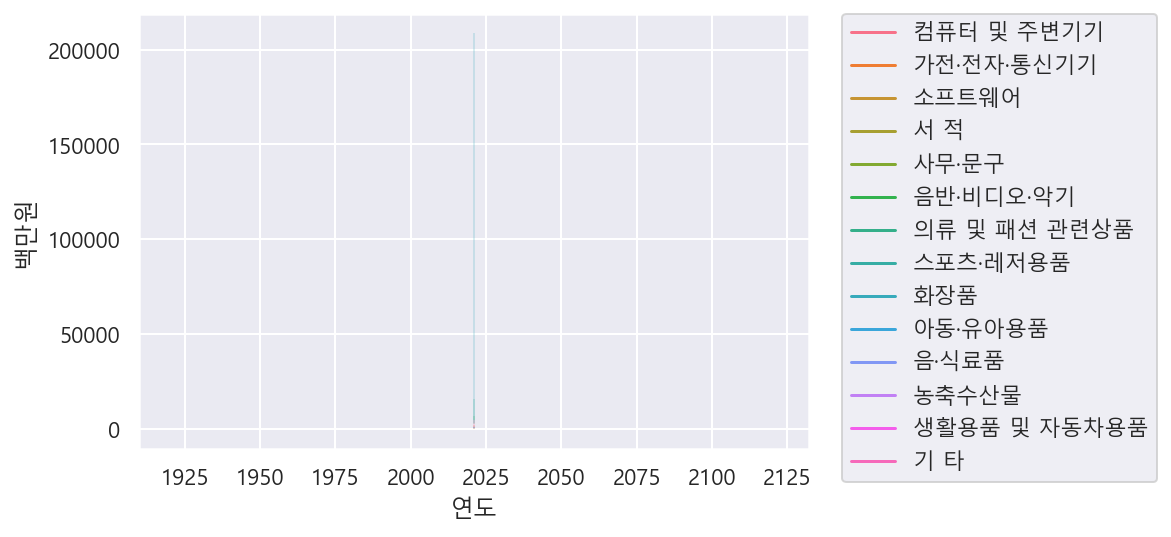

In [27]:
#  연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기
sns.lineplot(data=df_total, x='연도', y='백만원', hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

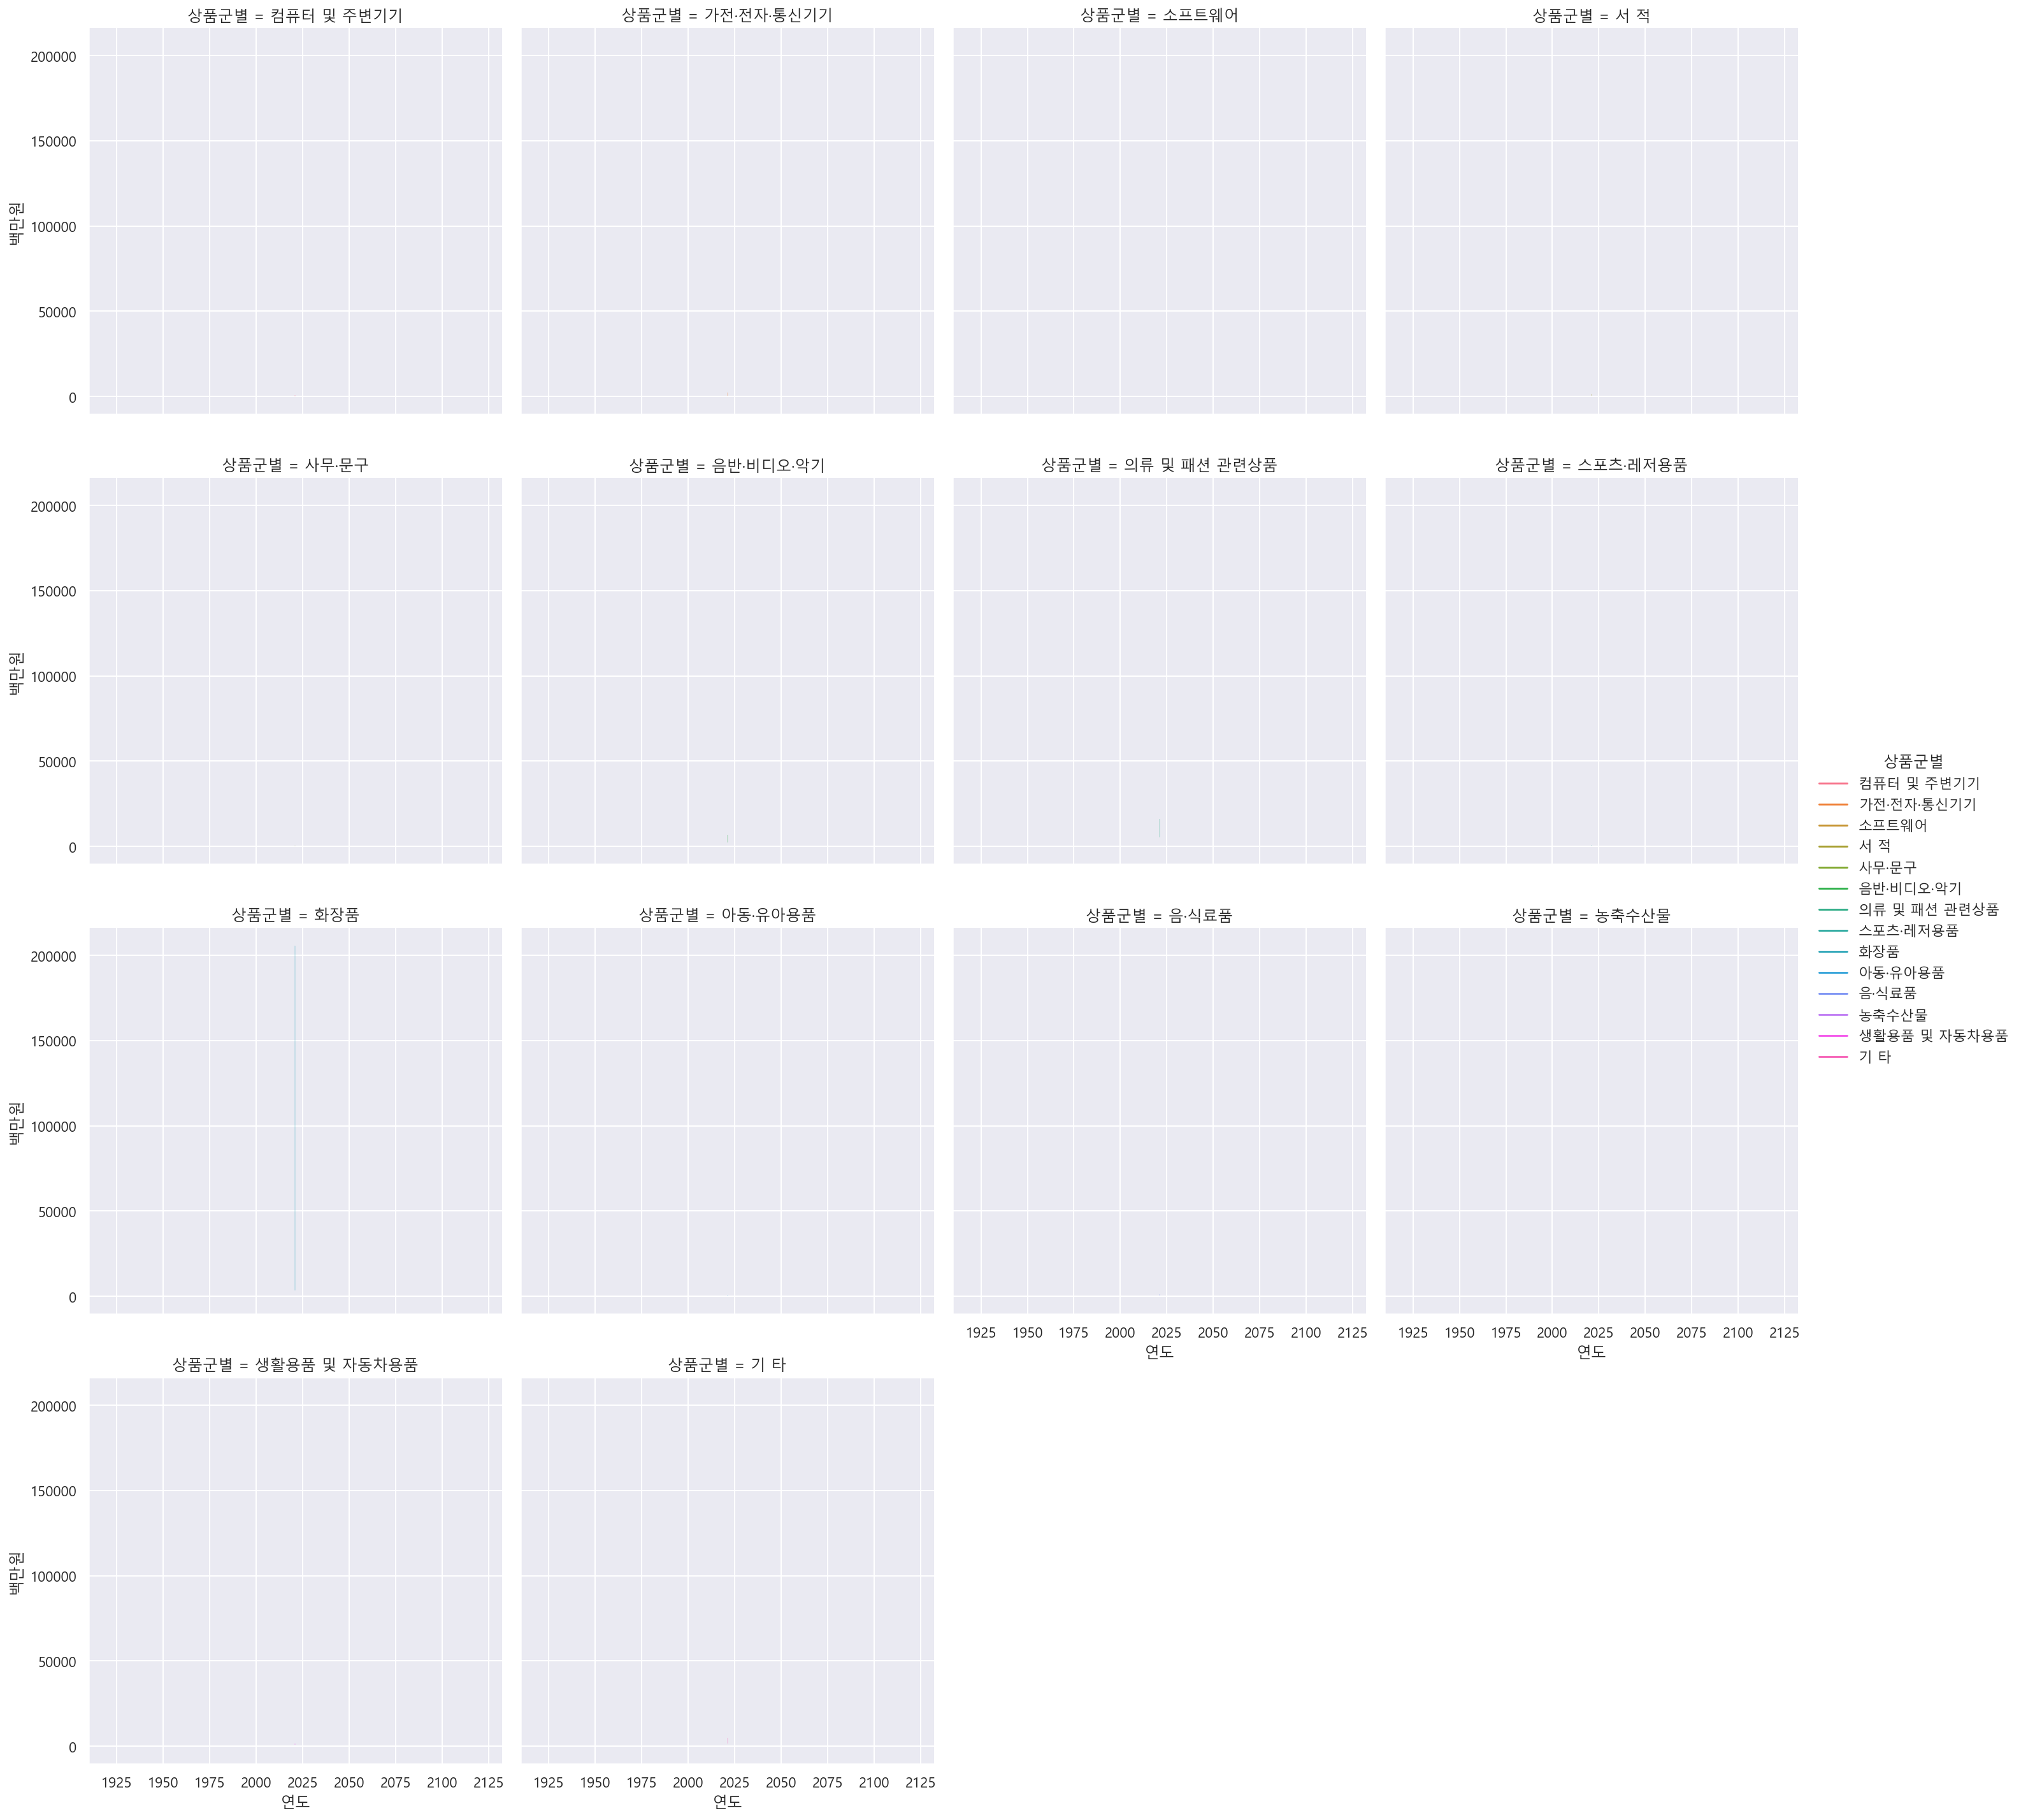

In [32]:
# 윙 ㅔ그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
sns.relplot(data=df_total, x='연도', y='백만원', hue='상품군별',col='상품군별',col_wrap=4, kind='line')

In [41]:
# isin을 사용해 화장품만 제외하고 df_sub이라는 변수에 담습니다.
df_sub=df_total[-df_total['상품군별'].isin(['화장품','의류 및 패션관련 상품'])]


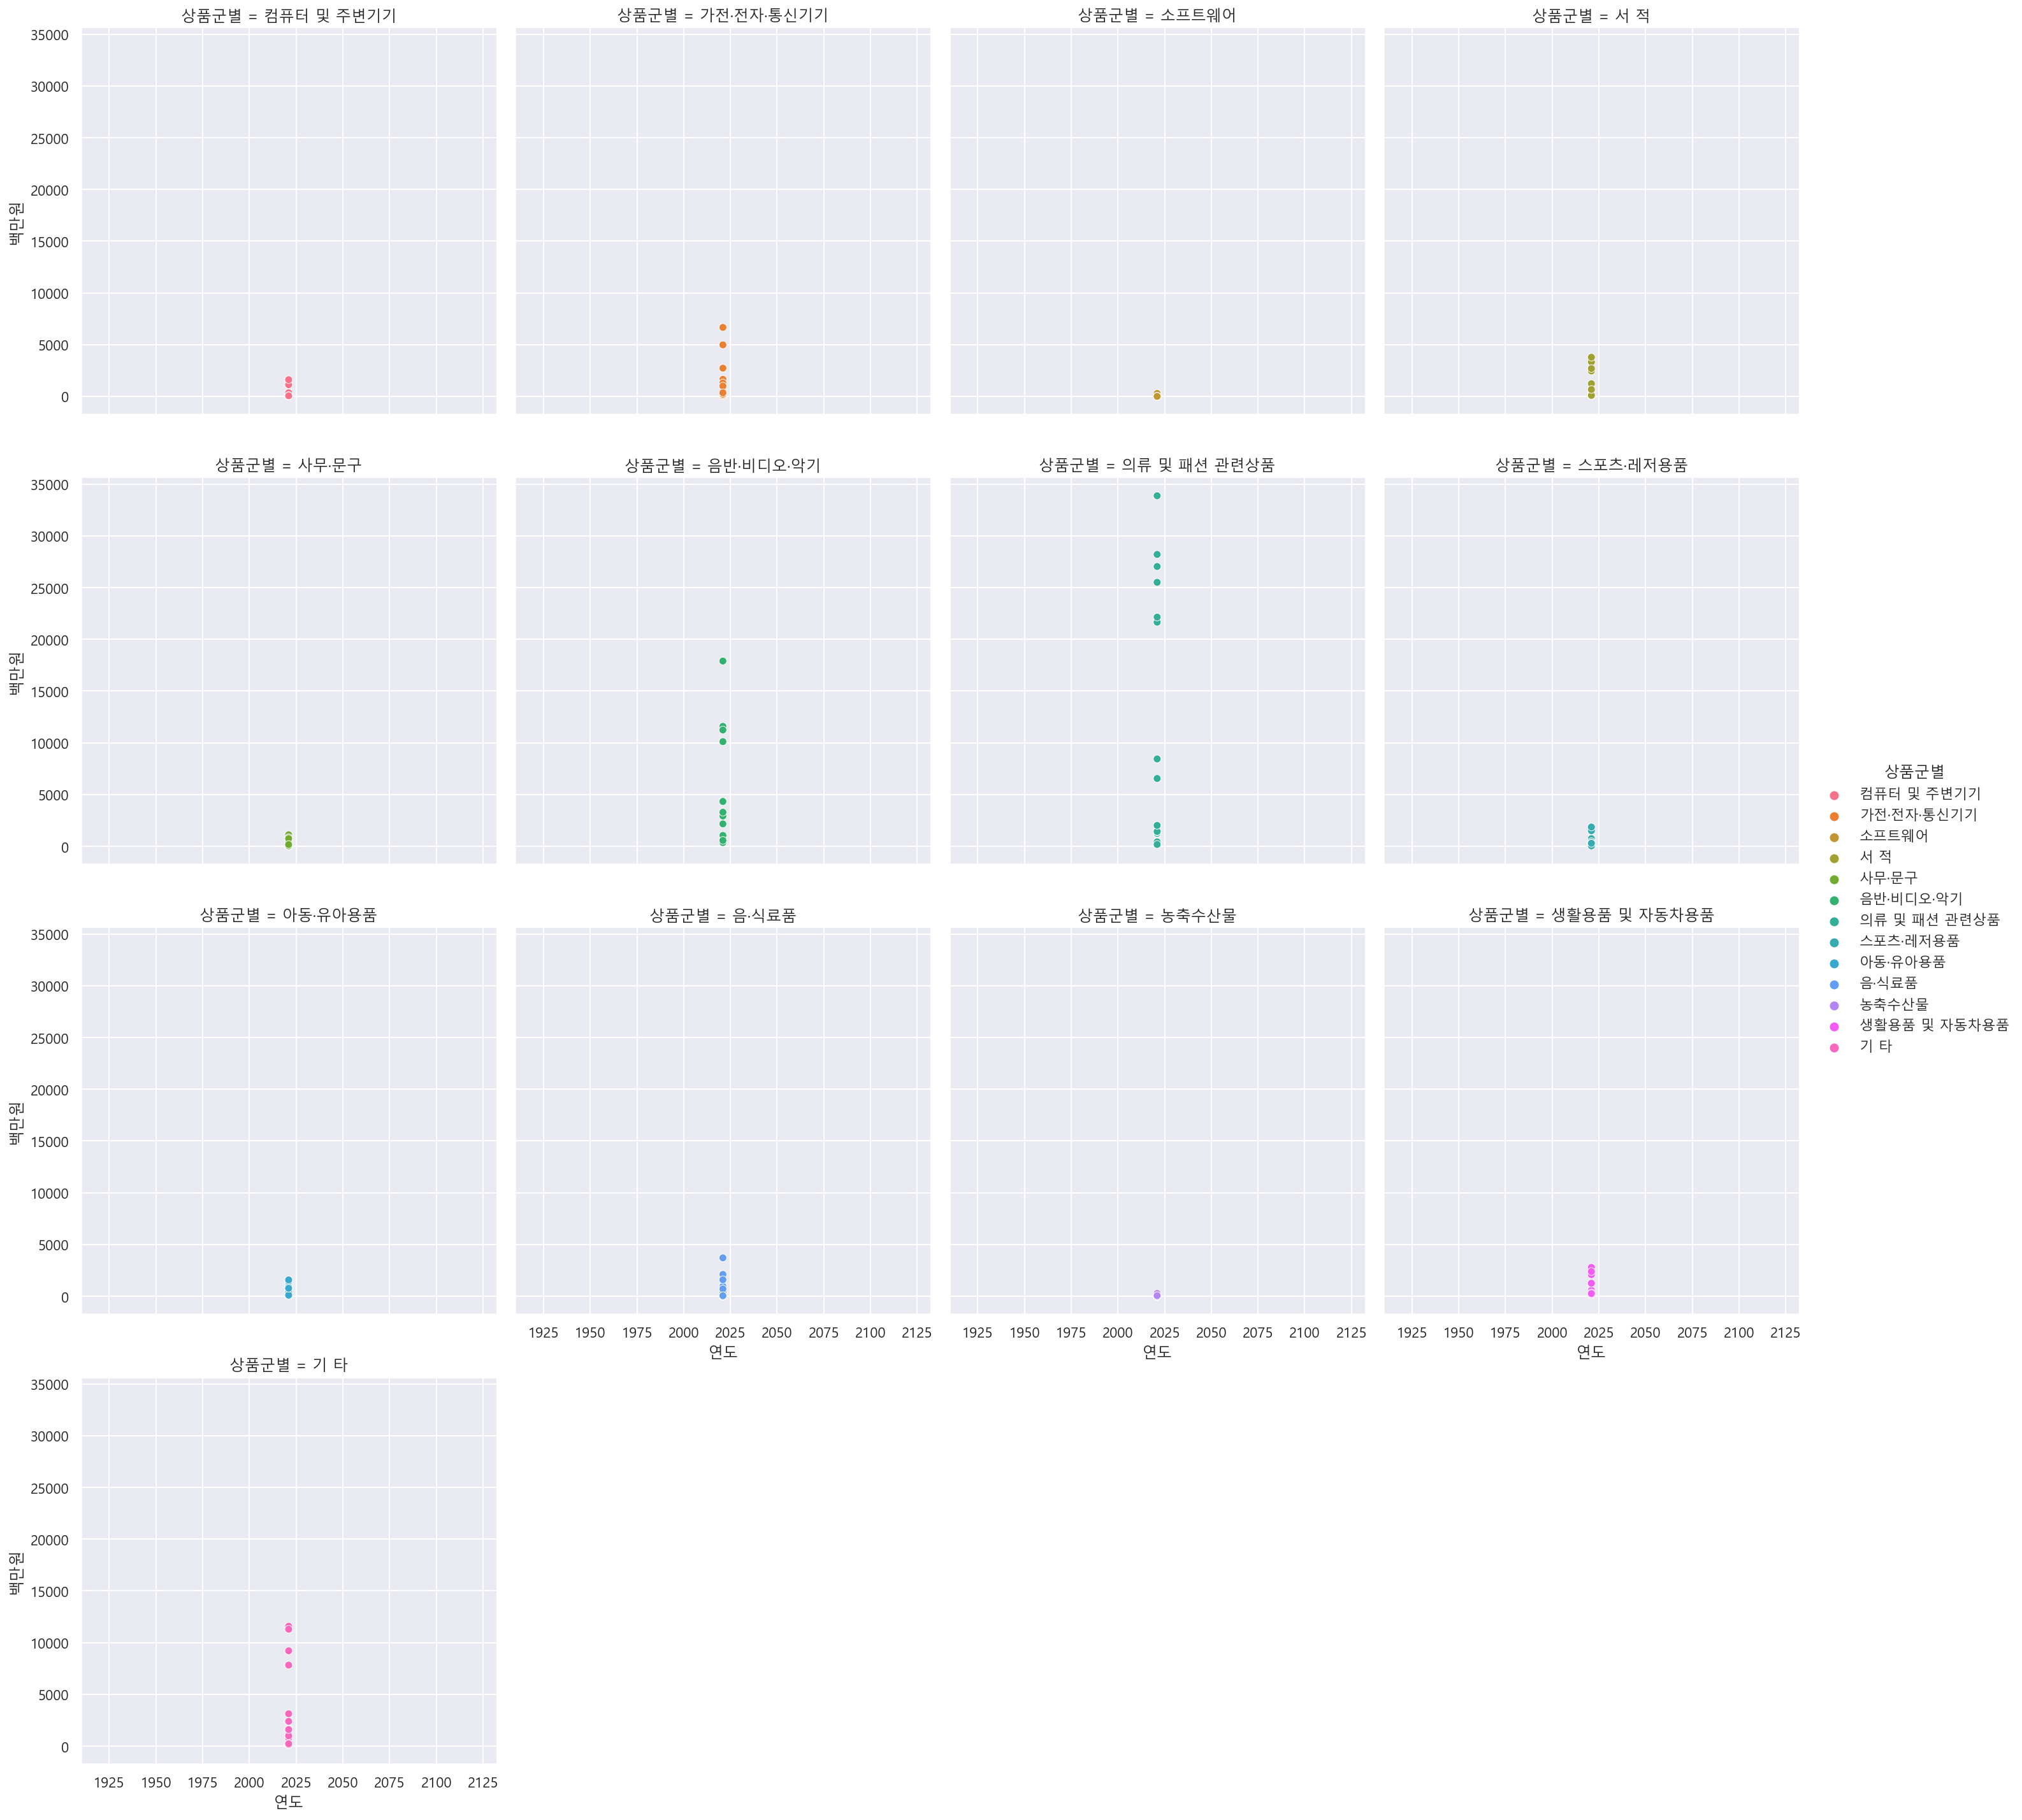

In [42]:
sns.relplot(data=df_sub, x='연도', y='백만원', hue='상품군별', col='상품군별', col_wrap=4)

### 6.2 화장품의 온라인쇼핑 해외직접판매액

In [48]:
# df_cosmetic 이라는 변수에 상품군별이 화장품인 데이터만 가져오기
df_cosmetic=df_total[df_total['상품군별']=='화장품'].copy()
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

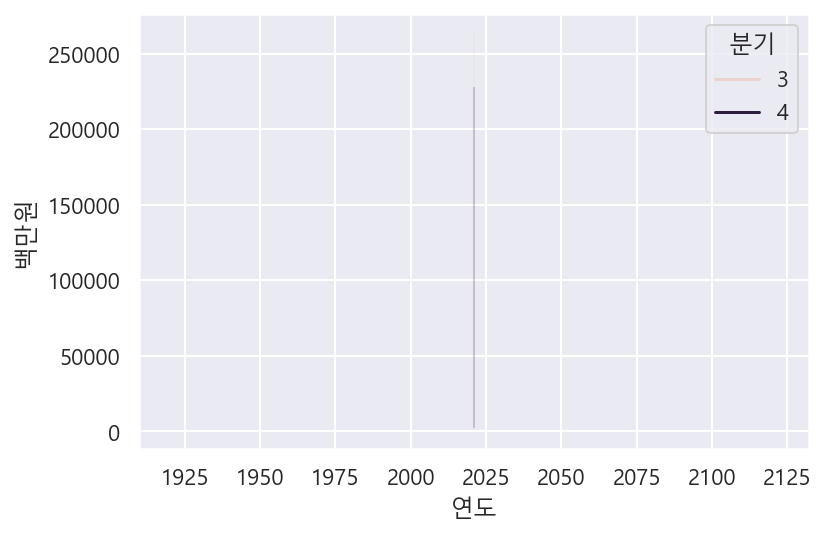

In [49]:
# 연도와 판매액을  lineplot으로 그리고 분기별로 다른 색사응로 표현해 보기
sns.lineplot(data=df_cosmetic, x='연도', y='백만원', hue='분기')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

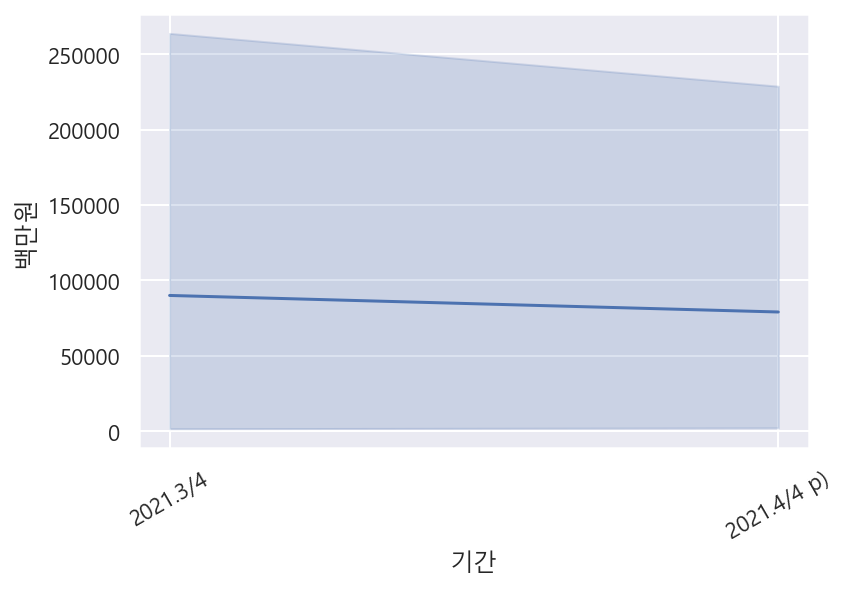

In [51]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기

# 글자 기울이기
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

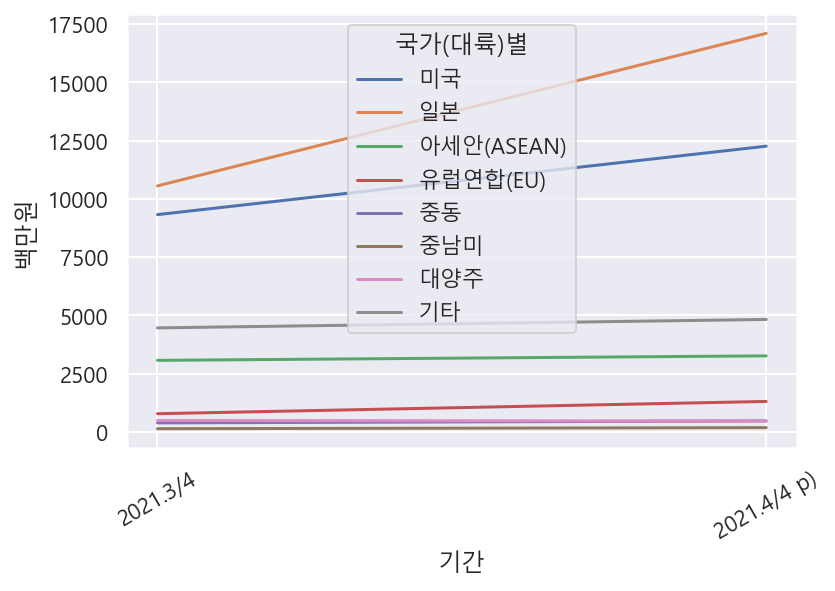

In [53]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 '국가(대륙)별'로 다른 색상으로 표시하기
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic['국가(대륙)별'] !='중국'], x='기간', y='백만원', hue='국가(대륙)별')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

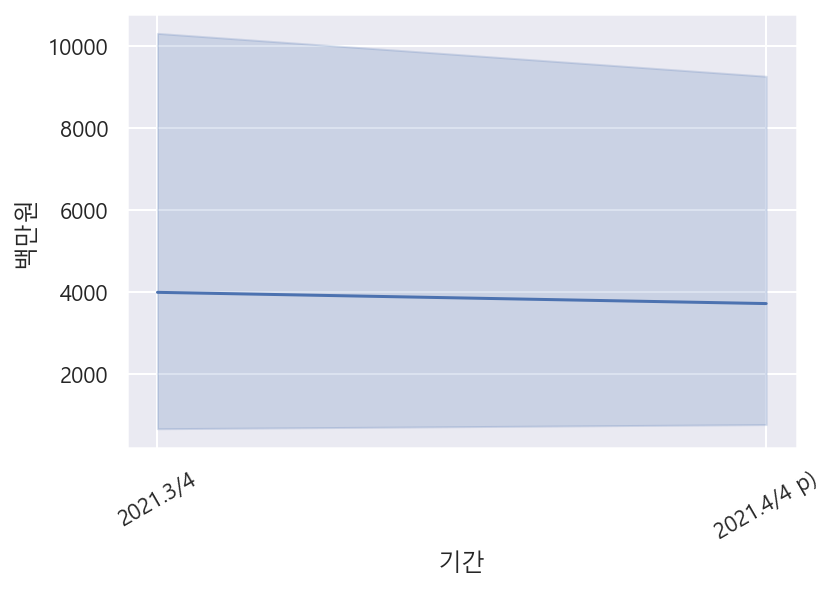

In [60]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 '판매유형별'로 다른 색상으로 표시하기
plt.xticks(rotation=30)
df_sub=df[df['판매유형별'] != "계"].copy()
sns.lineplot(data=df_sub, x='기간', y='백만원')


### 6.3 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [61]:
# df_fashion 이라는 변쉥 의류 데이터만 가져와 따로 담아주기
df_fashion=df[df['상품군별']=='의류 및 패션관련 상품'].copy()
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기


<AxesSubplot:>

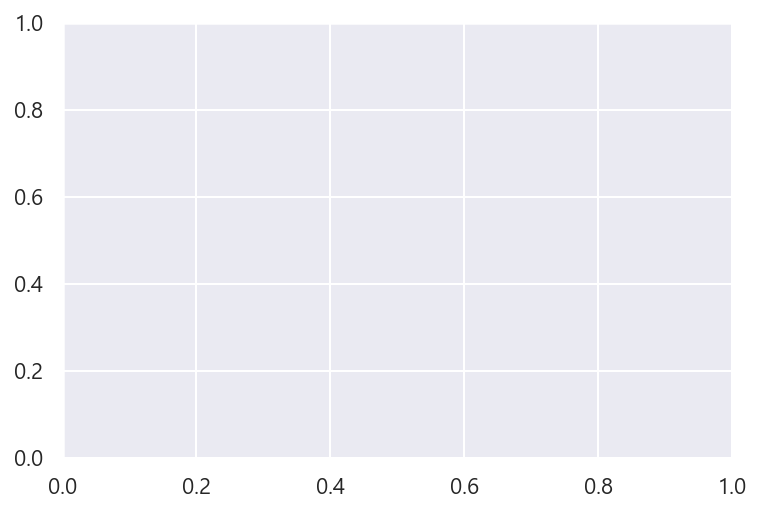

In [62]:
# '의류 및 패션관련 상품' 판매액에 대한 기간별 금액 데이터 시각화하고
# "판매유형별"로 다른 색상으로 표시하기
sns.lineplot(data=df_fashion, x='기간', y='백만원')

### 6.4 데이터 집계하기


In [66]:
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기


In [71]:
# 피봇테이블로 "국가(대륙)별", "연도" 별 합계 금액을 표 형태로 구하기
result=df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")

### 6.5 연산결과를 시각적으로 보기

In [73]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

ValueError: zero-size array to reduction operation fmin which has no identity

# 7 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

In [74]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기

<AxesSubplot:xlabel='연도', ylabel='백만원'>

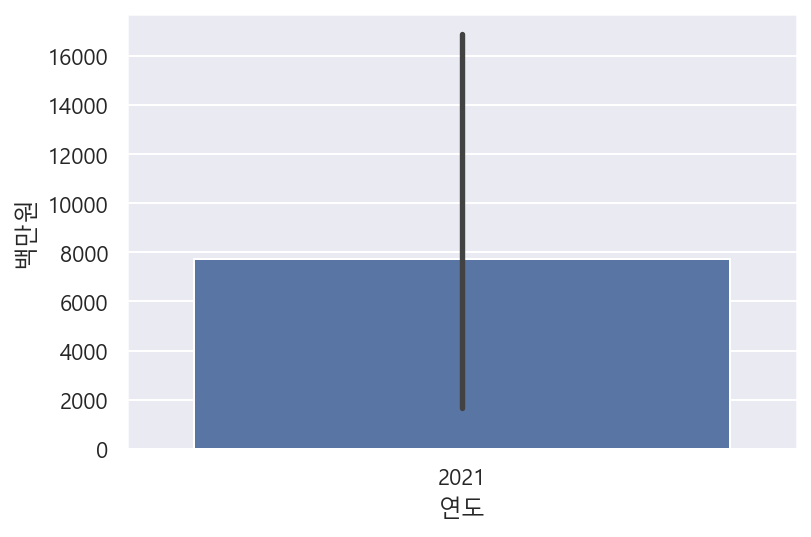

In [78]:
sns.barplot(data=df_total, x="연도", y="백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

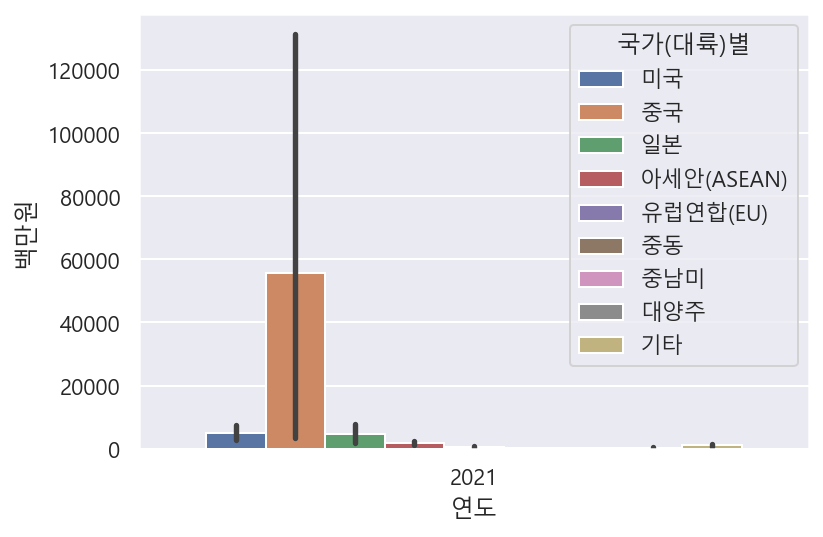

In [79]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기
sns.barplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

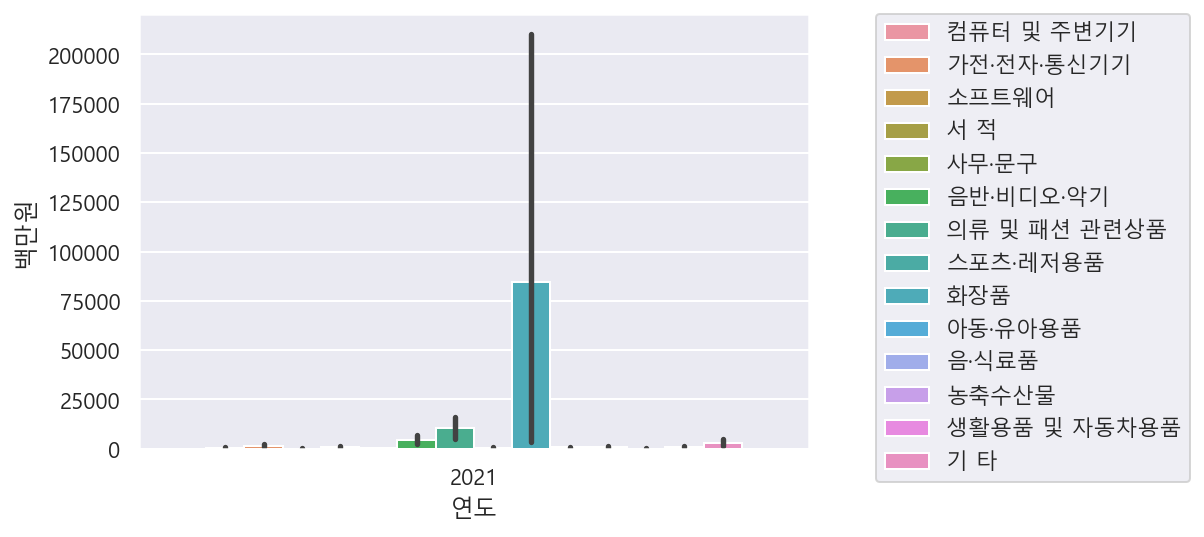

In [84]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기
sns.barplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)